#Student Name:
#Student ID:

#Student Name:
#Student ID:

#Student Name:
#Student ID:

#Student Name:
#Student ID:

In [2]:
import numpy as np
import pandas as pd
import re
from matplotlib.pylab import plt 
# indicate the output of plotting function is printed to the notebook
%matplotlib inline 

### Parameters
* SEED : Used as value for functions that take a random seed as an argument. The function of this parameter is to ensure repeatability between runs of the notebook
* TEST_SIZE : Used to determine the split of the dataset into a Test set and a Training Set. Needs to be specified as a float between 0.0 and 1.0

In [3]:
SEED = 1
TEST_SIZE = 0.3

### Dataset
Import the UCI Communities and Crimes dataset using Pandas
Details on the dataset is available at the following [link](http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data)

In [4]:
# Following code is from https://github.com/amclean3695/Communities-and-Crime/blob/master/Communities_and_Crime.ipynb
# TODO : See is there any other means for pulling column names from C45 file format
#Reads in names from textfile and performs regex to extract the attribute names 
textfile = open('communities.names','r')
filetext = textfile.read()
textfile.close()
matches = re.findall(r'-{2}\s(\w+)\:{1}', filetext)
col_names = matches[2:] #corresponds to the 128 attributes

In [5]:
df = pd.read_csv('communities.data', header=None, names=col_names)

#data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data'
#df = pd.read_csv(data_url, header=None)
# The above code does not work as PythonAnywhere blocks outgoing connections for free accounts to non-whitelisted sites

#print(df.head(5))
#dir(df)
print(df.shape)
#print(df['ViolentCrimesPerPop'].value_counts())

(1994, 128)


### Remove Non-Predictive Attributes

Of the 128 attributes loaded, for this dataset it is stated that:

Attribute Information: (122 predictive, 5 non-predictive, 1 goal) 
* state: US state (by number) - not counted as predictive above, but if considered, should be consided nominal (nominal) 
* county: numeric code for county - not predictive, and many missing values (numeric) 
* community: numeric code for community - not predictive and many missing values (numeric) 
* communityname: community name - not predictive - for information only (string) 
* fold: fold number for non-random 10 fold cross validation, potentially useful for debugging, paired tests - not predictive (numeric) 

Therefore I will drop county, community, communityname and fold from the dataset and explore if state is a good predictor before deciding to retain or now. This reduces the total number of columns from 128 to 123

In [6]:
df = df.drop(['county', 'community', 'communityname', 'fold'], axis=1)
print(df.shape)


(1994, 124)


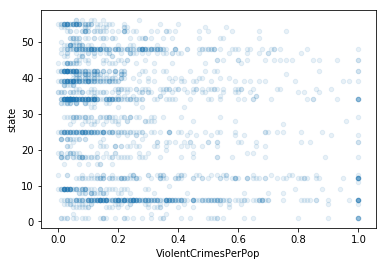

`State` is correlated with `Violent crime per capita` at: -0.2113975153956961 which makes it the 66th best correlation out of 100 considered in correlation matrix


In [7]:
df.plot(kind="scatter", x="ViolentCrimesPerPop", y="state", alpha=0.1)
plt.show()


correlation = df.corr()["ViolentCrimesPerPop"]
# I will now sort the correlations by absolute value so we can calculate 
# how goood a predictor state is compared with other attributes
correlation_absolute = abs(correlation).sort_values(ascending=False)
state_correlation = correlation["state"]
state_correlation_position = correlation_absolute.keys().get_loc('state')

print("`State` is correlated with `Violent crime per capita` at: {} which makes it the {}th best correlation out of {} considered in correlation matrix"
      .format(state_correlation,state_correlation_position+1,len(correlation)-1))

As we can see from the above cell I think that state should be considered as we can see from the scatterplot that some states appear to have a wider variance of violent crimes per population and that it is around the middle of the road as far as correlations go (there are predictors with lower correlations to the target value)

In [8]:
#print(df.head(5))
# From DePy_Talk Noteboook
# How much of your data is missing?
df.isnull().sum().sort_values(ascending=False).head()

ViolentCrimesPerPop    0
PctKids2Par            0
PctBSorMore            0
PctUnemployed          0
PctEmploy              0
dtype: int64

There are no cells with missing data
However, visually inspecting the data, there are cells with "?" and this needs to be replaced with "NaN" (Not a Number)

In [9]:
df = df.replace('?', np.nan)
print(df.columns[df.isnull().any()])

Index(['OtherPerCap', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps',
       'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop',
       'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol',
       'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian',
       'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz',
       'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr',
       'LemasGangUnitDeploy', 'PolicBudgPerPop'],
      dtype='object')


In [10]:
df.isnull().sum().sort_values(ascending=False).head(25)

LemasSwFTFieldPerPop    1675
LemasTotalReq           1675
PolicReqPerOffic        1675
PolicPerPop             1675
RacialMatchCommPol      1675
PctPolicWhite           1675
PctPolicBlack           1675
PctPolicHisp            1675
PctPolicAsian           1675
PctPolicMinor           1675
OfficAssgnDrugUnits     1675
NumKindsDrugsSeiz       1675
PolicAveOTWorked        1675
LemasSwFTFieldOps       1675
LemasSwFTPerPop         1675
LemasSwornFT            1675
PolicCars               1675
PolicOperBudg           1675
LemasPctPolicOnPatr     1675
LemasGangUnitDeploy     1675
PolicBudgPerPop         1675
LemasTotReqPerPop       1675
OtherPerCap                1
AsianPerCap                0
PctKids2Par                0
dtype: int64

In [11]:
#print(df.isnull().sum())
print(df.shape)
print(df.shape[0])
print(df['LemasSwFTFieldPerPop'].isnull().sum())
for column in df:
    if(df[column].isnull().sum()>=(df.shape[0]/2)):
        print("Column ", column, df[column].isnull().sum())
        df = df.drop([column], axis=1)
print(df.shape)

(1994, 124)
1994
1675
Column  LemasSwornFT 1675
Column  LemasSwFTPerPop 1675
Column  LemasSwFTFieldOps 1675
Column  LemasSwFTFieldPerPop 1675
Column  LemasTotalReq 1675
Column  LemasTotReqPerPop 1675
Column  PolicReqPerOffic 1675
Column  PolicPerPop 1675
Column  RacialMatchCommPol 1675
Column  PctPolicWhite 1675
Column  PctPolicBlack 1675
Column  PctPolicHisp 1675
Column  PctPolicAsian 1675
Column  PctPolicMinor 1675
Column  OfficAssgnDrugUnits 1675
Column  NumKindsDrugsSeiz 1675
Column  PolicAveOTWorked 1675
Column  PolicCars 1675
Column  PolicOperBudg 1675
Column  LemasPctPolicOnPatr 1675
Column  LemasGangUnitDeploy 1675
Column  PolicBudgPerPop 1675
(1994, 102)


In [12]:
df.isnull().sum().sort_values(ascending=False).head(25)

OtherPerCap            1
PctOccupManu           0
HispPerCap             0
NumUnderPov            0
PctPopUnderPov         0
PctLess9thGrade        0
PctNotHSGrad           0
PctBSorMore            0
PctUnemployed          0
PctEmploy              0
PctEmplManu            0
PctEmplProfServ        0
ViolentCrimesPerPop    0
AsianPerCap            0
MalePctDivorce         0
MalePctNevMarr         0
FemalePctDiv           0
TotalPctDiv            0
PersPerFam             0
PctFam2Par             0
PctKids2Par            0
PctYoungKids2Par       0
PctTeen2Par            0
PctWorkMomYoungKids    0
PctOccupMgmtProf       0
dtype: int64

There is only one missing value remaining but lets impute it for the craic using code from the DePy_Talk notebook

In [13]:
# print(df['OtherPerCap'][130])

# # dir(sklearn)
# # from sklearn.impute import SimpleImputer

# # imp = SimpleImputer(missing_values=np.nan, strategy='mean')
# # imp.fit(df) 
# # X = pd.DataFrame(data=imp.transform(df) , columns=df.columns)

# from sklearn.impute import SimpleImputer
# my_imputer = SimpleImputer()

#TEMP WORKAROUND
# Set to median
print(df['OtherPerCap'][130])
#print(df['OtherPerCap'].median())
#print(df['OtherPerCap'].mean())
dir(df['OtherPerCap'])
miss_median = df['OtherPerCap'].median()
df['OtherPerCap'][130] = miss_median
print(df['OtherPerCap'][130])

nan
0.25


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Outlier Detection

In [14]:
# Store off original dataset without outlier detection and removal
dataset = df.values

# From DePy_Talk Notebook[1]
def find_outliers_tukey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])
    
    return outlier_indices, outlier_values

tukey_indices, tukey_values = find_outliers_tukey(df['ViolentCrimesPerPop'])

print("Shape Before Outlier Removal")
print(df.shape)
#print("Entry 26", df['ViolentCrimesPerPop'][26])
print("Outliers = ",len(tukey_indices), "out of ",len(df['ViolentCrimesPerPop']), "in ViolentCrimesPerPop Column")
#print(np.sort(tukey_values))
#print(np.sort(tukey_indices))
for i in range(len(tukey_indices)):
    #print("i : ", i, "Index", tukey_indices[i], "Value", tukey_values[i])
    # Drop row containing the outlier
    df = df.drop([tukey_indices[i]], axis=0)
print("Shape After Outlier Removal")
print(df.shape)

# Store dataset with outlier
tukey_dataset = df.values

Shape Before Outlier Removal
(1994, 102)
Outliers =  110 out of  1994 in ViolentCrimesPerPop Column
Shape After Outlier Removal
(1884, 102)


### Split Up Dataset

In [15]:
print(dataset.shape)
X = dataset[:, 0:100]
y = dataset[:, 100]

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=SEED) 

(1994, 102)


### Scale the Dataset
TODO ADD DETAILS MPP

In [16]:
# Scale the dataset
from sklearn.preprocessing import StandardScaler 
# Scale the data with respect to the training data set 
scaler = StandardScaler() 
scaler.fit(X_train) 

X_scaled_train = scaler.transform(X_train) 
# Scaling the test set using the transform defined by the train set. 
X_scaled_test = scaler.transform(X_test) 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Ridge Model
Run regression using Ridge Model with [default values](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

TODO add details on alpha value section MPP

In [17]:
from sklearn import linear_model
clf = linear_model.BayesianRidge()
clf.fit(X_scaled_train, y_train)

# Determine accuracy using the train set
y_hat_train = clf.predict(X_scaled_train)


from sklearn.metrics import mean_absolute_error
print("MAE ", mean_absolute_error(y_train, y_hat_train))
from sklearn.metrics import mean_squared_error
print("MSE ", mean_squared_error(y_train, y_hat_train))
from sklearn.metrics import r2_score
print("R2S ", r2_score(y_train, y_hat_train))

MAE  0.1197273800509342
MSE  0.03972809978961318
R2S  0.306748750874389


In [18]:
y_hat = clf.predict(X_scaled_test)

In [19]:
print(y_hat.shape)
print(y_test.shape)
print(y_hat[0:5])
print(y_test[0:5])
print(clf.score(X_scaled_test,y_test))

(599,)
(599,)
[ 0.01541401  0.02851873  0.14261047 -0.02053621  0.14026215]
[0.0 0.0 0.57 0.0 0.0]
0.34842523016001337


Ridge regression appears to have predictions which are less than zero. 



In [20]:
#from sklearn.metrics import mean_absolute_error
print("MAE ", mean_absolute_error(y_test, y_hat))
#from sklearn.metrics import mean_squared_error
print("MSE ", mean_squared_error(y_test, y_hat))
#from sklearn.metrics import r2_score
print("R2S ", r2_score(y_test, y_hat))

MAE  0.12021328837467354
MSE  0.03825403080862959
R2S  0.34842523016001337


### Gridsearch

In [23]:
from sklearn.linear_model import RidgeCV
lasso_cv = RidgeCV(alphas = None, cv = 10) 
lasso_cv.fit(X_scaled_train, y_train)
print(lasso_cv.alpha_)
#print(lasso_cv.mse_path_)
#print(lasso_cv.alphas_)

# Determine accuracy using the train set
y_hat_cv_train = clf.predict(X_scaled_train)

print("MAE ", mean_absolute_error(y_train, y_hat_cv_train))
print("MSE ", mean_squared_error(y_train, y_hat_cv_train))
print("R2S ", r2_score(y_train, y_hat_cv_train))

ValueError: Parameter values for parameter (alpha) need to be a sequence(but not a string) or np.ndarray.

In [ ]:
y_hat_cv = lasso_cv.predict(X_scaled_test)
print(y_hat_cv[0:20])
print(y_test[0:20])
print("MAE ", mean_absolute_error(y_test, y_hat_cv))
print("MSE ", mean_squared_error(y_test, y_hat_cv))
print("R2S ", r2_score(y_test, y_hat_cv))

### PCA

In [ ]:
from sklearn.decomposition import PCA 
pca = PCA()
pca.fit(X_scaled_train)
X_pca_train = pca.transform(X_scaled_train)
print(pca.explained_variance_)
print(len(pca.explained_variance_))
print(X_pca_train.shape)
print(type(pca.explained_variance_))
print(pca.explained_variance_.sum())
print(pca.explained_variance_ratio_)

n_components_pca = 0

percent_contrib = 0.05

for i in range(len(pca.explained_variance_)):
    if(pca.explained_variance_ratio_[i]>=(percent_contrib/100)):
        n_components_pca+=1
print("Number of PCA components that contribute >=",percent_contrib,"% of variance is ",n_components_pca)

pca_red = PCA(n_components=n_components_pca)
pca_red.fit(X_scaled_train)
X_pca_red_train = pca_red.transform(X_scaled_train)
X_pca_red_test = pca_red.transform(X_scaled_test)
print(pca_red.explained_variance_)
print(len(pca_red.explained_variance_))
print(X_pca_red_train.shape)
print(X_pca_red_test.shape)
print(type(pca_red.explained_variance_))
print(pca_red.explained_variance_.sum())
print(pca_red.explained_variance_ratio_)
    

In [ ]:
clf_pca = linear_model.Ridge(alpha=0.1)
clf_pca.fit(X_pca_red_train, y_train)
y_pca_red_hat = clf_pca.predict(X_pca_red_test)
print(y_pca_red_hat.shape)
print(y_test.shape)
print(y_pca_red_hat[0:5])
print(y_test[0:5])
print(clf_pca.score(X_pca_red_test,y_test))
print("MAE ", mean_absolute_error(y_test, y_pca_red_hat))
from sklearn.metrics import mean_squared_error
print("MSE ", mean_squared_error(y_test, y_pca_red_hat))
from sklearn.metrics import r2_score
print("R2S ", r2_score(y_test, y_pca_red_hat))

In [ ]:
lasso_pca_cv = RidgeCV(alphas = None, cv = 10, max_iter = 1000, random_state=SEED) 
lasso_pca_cv.fit(X_pca_red_train, y_train)
print(lasso_pca_cv.alpha_)

y_pca_red_hat_cv = lasso_pca_cv.predict(X_pca_red_test)
print(y_pca_red_hat_cv[0:20])
print(y_test[0:20])
print("MAE ", mean_absolute_error(y_test, y_pca_red_hat_cv))
print("MSE ", mean_squared_error(y_test, y_pca_red_hat_cv))
print("R2S ", r2_score(y_test, y_pca_red_hat_cv))

### Finally we will visualize the results by comparing predictive power of n_components classifier, original_classifier and the classifier after grid search

In [ ]:
pca_for_count_of_components = PCA()
pca_for_count_of_components.fit(X_scaled_train)
total_components = len(pca.explained_variance_)
pca_results_n_components_lasso = []
pca_results_n_components_lasso_cv = []

for i in range(total_components):
    pca_n = PCA(n_components=i+1)
    pca_n.fit(X_scaled_train)
    X_pca_n_train = pca_n.transform(X_scaled_train)
    X_pca_n_test = pca_n.transform(X_scaled_test)
    clf_pca = linear_model.Ridge(alpha=0.1)
    clf_pca.fit(X_pca_n_train, y_train)
    y_n_hat = clf_pca.predict(X_pca_n_test)
    mae = mean_absolute_error(y_test, y_n_hat)
    mse = mean_squared_error(y_test, y_n_hat)
    r2s = r2_score(y_test, y_n_hat)
    pca_results_n_components_lasso.append((mae,mse,r2s))
    
    lasso_pca_cv_n = RidgeCV(alphas = None, cv = 10, max_iter = 1000, random_state=SEED) 
    lasso_pca_cv_n.fit(X_pca_n_train, y_train)
    y_n_hat_cv = lasso_pca_cv_n.predict(X_pca_n_test)
    mae_cv = mean_absolute_error(y_test, y_n_hat_cv)
    mse_cv = mean_squared_error(y_test, y_n_hat_cv)
    r2s_cv = r2_score(y_test, y_n_hat_cv)
    pca_results_n_components_lasso_cv.append((mae_cv,mse_cv,r2s_cv))
    
    
maes, mses, r2ss = zip(*pca_results_n_components_lasso)
maes_cv, mses_cv, r2ss_cv = zip(*pca_results_n_components_lasso_cv)

mae_original =  mean_absolute_error(y_test, y_hat)
mse_original =  mean_squared_error(y_test, y_hat)
r2s_original = r2_score(y_test, y_hat)

mae_cv =  mean_absolute_error(y_test, y_hat_cv)
mse_cv =  mean_squared_error(y_test, y_hat_cv)
r2s_cv = r2_score(y_test, y_hat_cv)

plt.title("absolute errors")
plt.xlabel("n_components")
plt.axhline(y=mae_original, color='r', linestyle='-', label="original regression")
plt.axhline(y=mae_cv, color='g', linestyle='-.', label="regression after grid search")
plt.plot(maes, color='b', linestyle='-.', label="ridge regression after PCA")
plt.plot(maes_cv, color='y', linestyle=':',label="ridge regression after PCA and grid search")
plt.legend(loc='best')
plt.show()
print("original_regression: {}".format(mae_original))
print("regression after grid search: {}".format(mae_cv))
print("regression after PCA: {}".format(maes[-1]))
print("regression after PCA and grid search: {}".format(maes_cv[-1]))

plt.title("mean square error")
plt.xlabel("n_components")
plt.axhline(y=mse_original, color='r', linestyle='-', label="original regression")
plt.axhline(y=mse_cv, color='g', linestyle='-.', label="regression after grid search")
plt.plot(mses, color='b', linestyle='-.',label="ridge regression after PCA")
plt.plot(mses_cv, color='y', linestyle=':',label="ridge regression after PCA and grid search")
plt.legend(loc='best')
plt.show()
print("original_regression: {}".format(mse_original))
print("regression after grid search: {}".format(mse_cv))
print("regression after PCA: {}".format(mses[-1]))
print("regression after PCA and grid search: {}".format(mses_cv[-1]))

plt.title("r2 scores")
plt.xlabel("n_components")
plt.axhline(y=r2s_original, color='r', linestyle='-', label="original regression")
plt.axhline(y=r2s_cv, color='g', linestyle='-.', label="regression after grid search")
plt.plot(r2ss, color='b', linestyle='-.',label="ridge regression after PCA")
plt.plot(r2ss_cv, color='y', linestyle=':',label="ridge regression after PCA and grid search")
plt.legend(loc='best')
plt.show()
print("original_regression: {}".format(r2s_original))
print("regression after grid search: {}".format(r2s_cv))
print("regression after PCA: {}".format(r2ss[-1]))
print("regression after PCA and grid search: {}".format(r2ss_cv[-1]))

#### References
* [1] [Depy 2016 Talk: Pre-Modeling: Data Preprocessing and Feature Exploration in Python Notebook](https://github.com/aprilypchen/depy2016/blob/master/DePy_Talk.ipynb)
* [2] [amclean3695's Communities-and-Crime Notebook](https://github.com/amclean3695/Communities-and-Crime/blob/master/Communities_and_Crime.ipynb)